# Understanding Political Sentiment on Twitter
> Authors: Meghan Mandi and Duncan Grubbs

In [116]:
# Python Libs
import re
import csv
import os
import datetime

# Sentiment & Text analysis libs
from wordcloud import WordCloud
from textblob import TextBlob

# plotting and math libs
from tqdm import tqdm
import matplotlib.pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Helper Functions and Lists

In [23]:
leaders_accounts = [
    'realDonaldTrump',
    'BernieSanders',
    'JoeBiden',
    'JustinTrudeau',
    'lopezobrador_',
    'narendramodi',
    'BorisJohnson',
    'MBuhari',
    'PresidencyZA',
    'ScottMorrisonMP',
    'EmmanuelMacron',
    'IsraeliPM'
]

six_month_accs = [
    'EmmanuelMacron',
    'lopezobrador_',
    'narendramodi'
]

In [117]:
def clean_tweet(tweet):
    tweet = tweet.lower()
    regs = [
        r'(\/\/www[^\s]+)',
        r'(pic.twitter.com\/[^\s]+)',
        r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',
        r'(?i)\b((?:https?:\/\/[^\s]+))',
        r'https'
    ]
    prev = tweet
    for reg in regs:
        prev = re.sub(reg, " ", prev)
    return prev

def get_tweets_list(account):
    tweets = []
    with open(f'./data/{account}.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        keys = next(csv_reader)
        for row in csv_reader:
            tweet = {}
            tweet[keys[0]] = row[0]
            tweet[keys[1]] = row[1]
            tweet[keys[6]] = clean_tweet(row[6])
            tweets.append(tweet)
    return tweets

def get_tweets(username):
    l = get_tweets_list(username)
    l.reverse()
    return l

In [118]:
# verify start and end data for all accounts
for acc in leaders_accounts:
    tl = get_tweets_list(acc)
    s = tl[0]['date']
    e = tl[-1]['date']
    if (s[:4] != '2019' or e[:4] != '2015'):
        if (acc not in six_month_accs):
            print(f'acc: {acc}, start: {s}, end: {e}')

### Wordclouds
First, let's compare some of the worlds biggest leaders tweets by looking at wordclouds.

In [119]:
def generate_wordcloud(tweets):
    '''Generates a WordCloud from a list of tweets'''
    tweets_con = ''
    for t in tweets:
        tweets_con += t['text']
    return WordCloud(background_color='white', width=1000, height=600).generate(tweets_con)

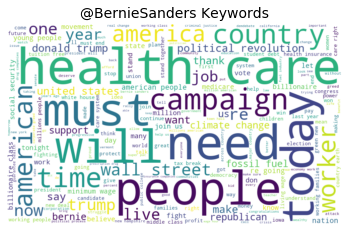

In [121]:
wc_list = [
    'realDonaldTrump',
    'BorisJohnson',
    'BernieSanders',
    'JoeBiden',
    'PresidencyZA',
    'ScottMorrisonMP',
    'IsraeliPM'
]

def plot_wordcloud(wc, title):
    '''Plots a given wordcloud and saves locally in the preferred style'''
    plt.title(title, fontsize=14)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'./blog_res/{title}.png', dpi=400)
    
for acc in wc_list:
    t_list = get_tweets_list(acc)
    t_list.reverse()
    wc = generate_wordcloud(t_list)
    plot_wordcloud(wc, f'@{acc} Keywords')

### Length and Number of Tweets Analysis

In [162]:
# generate dics for plotting length of tweets (avg.)
# and total number of tweets
num_tweets = {}
len_tweets = {}

for acc in leaders_accounts:
    path = f'./data/{acc}.csv'
    if acc in six_month_accs:
        path = f'./data/nonenglish_original/{acc}.csv'
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        num = len(list(csv_reader)) - 1
        num_tweets[acc] = num
        
for acc in leaders_accounts:
    path = f'./data/{acc}.csv'
    if acc in six_month_accs:
        path = f'./data/nonenglish_original/{acc}.csv'
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        keys = next(csv_reader)
        avg = 0
        for row in csv_reader:
            avg += len(row[6])
        avg /= num_tweets[acc]
        len_tweets[acc] = avg
        
sorted_nums = {k: v for k, v in sorted(num_tweets.items(), key=lambda item: item[1])}
sorted_lens = {k: v for k, v in sorted(len_tweets.items(), key=lambda item: item[1])}

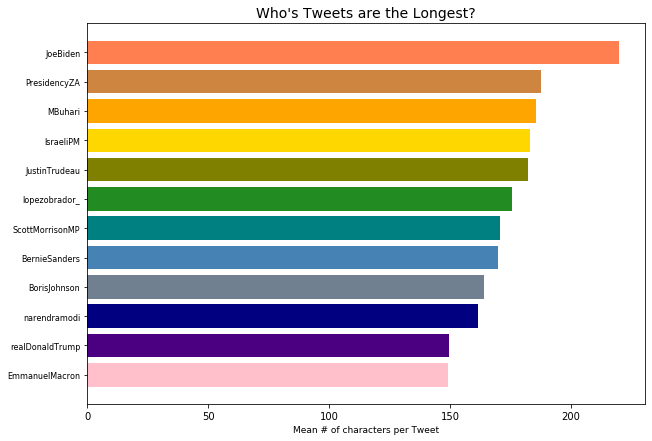

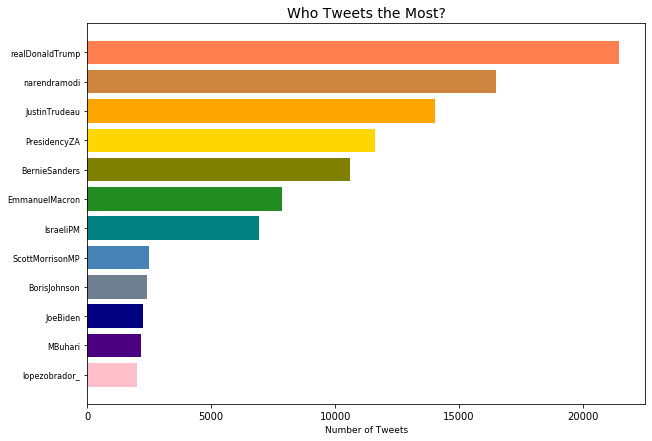

In [163]:
# colors for plotting length and number of tweets
colors = [
    'coral',
    'peru',
    'orange',
    'gold',
    'olive',
    'forestgreen',
    'teal',
    'steelblue',
    'slategrey',
    'navy',
    'indigo',
    'pink'
]
colors.reverse()

def plot_num_tweets_comp():
    '''Plots number of tweets from data generated above'''
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.barh(
        list(sorted_nums.keys()),
        list(sorted_nums.values()),
        align='center',
        color=colors)
    plt.yticks(fontsize=8)
    plt.xlabel('Number of Tweets', fontsize=9)
    plt.title('Who Tweets the Most?', fontsize=14)
    plt.savefig('./blog_res/num_comp.png', dpi=400)
    plt.show()
    
def plot_len_tweets_comp():
    '''Plots average length of tweets from data above'''
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.barh(
        list(sorted_lens.keys()),
        list(sorted_lens.values()),
        align='center',
        color=colors)
    plt.yticks(fontsize=8)
    plt.xlabel('Mean # of characters per Tweet', fontsize=9)
    plt.title('Who\'s Tweets are the Longest?', fontsize=14)
    plt.savefig('./blog_res/length_comp.png', dpi=400)
    plt.show()

# plot and save to files
plot_len_tweets_comp()
plot_num_tweets_comp()

### More Helper Methods

In [7]:
def inRange(tweet, start, end):
    date = tweet['date'][:10]
    s = datetime.datetime.strptime(start, "%Y-%m-%d")
    e = datetime.datetime.strptime(end, "%Y-%m-%d")
    check = datetime.datetime.strptime(date, "%Y-%m-%d")
    if s <= check <= e:
        return True
    return False

def get_tweets_range(tweets, start, end):
    active = False
    sub_section = []
    for tweet in tweets:
        if (inRange(tweet, start, end)):
            sub_section.append(tweet)
    return sub_section

# test that the range function is accurate
trump_tweets = get_tweets_list('realDonaldTrump')
assert len(get_tweets_range(trump_tweets, '2016-04-13', '2017-04-13')) == 2990

### Sentiment Analysis

__DON'T RUN THIS CELL OFTEN.__ It takes a very long time to run depending on the range inputed.

In [136]:
# english accounts for sentiment analysis
accounts_sent = [
    'realDonaldTrump',
    'BernieSanders',
    'JoeBiden',
    'JustinTrudeau',
    'lopezobrador_',
    'narendramodi',
    'BorisJohnson',
    'MBuhari',
    'PresidencyZA',
    'ScottMorrisonMP',
    'EmmanuelMacron',
    'IsraeliPM'
]

def avg_sent(tweets):
    '''
    Calculates the average polarity and
    subjectivity of a given list of tweets
    '''
    p = 0
    s = 0
    for tweet in tweets:
        ss = TextBlob(tweet['text']).sentiment
        p += ss[0]
        s += ss[1]
    pol = p / len(tweets)
    sub = s / len(tweets)
    return (pol, sub)

data = []
groups = []
for acc in tqdm(accounts_sent):
    tweets = get_tweets(acc)
    n_tweets = get_tweets_range(tweets, '2019-07-01', '2019-12-31')
    data.append(avg_sent(n_tweets))
    groups.append(acc)


100%|██████████| 12/12 [00:17<00:00,  1.47s/it]


### Plot all Accounts Comparison of Last 6 months

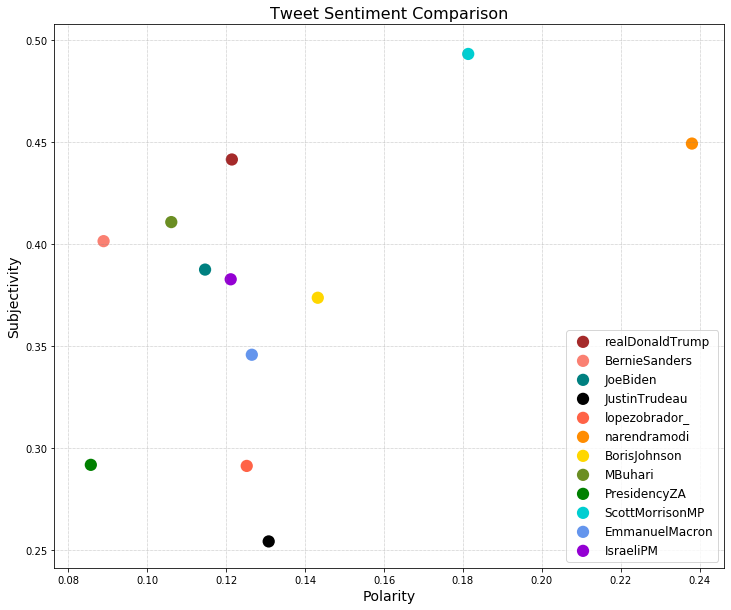

In [156]:
cols = [
    'brown',
    'salmon',
    'teal',
    'black',
    'tomato',
    'darkorange',
    'gold',
    'olivedrab',
    'green',
    'darkturquoise',
    'cornflowerblue',
    'darkviolet'
]

# Create plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)

for pair, color, group in zip(data, cols, groups):
    x, y = pair
    ax.scatter(x, y, c=color, edgecolors='none', s=150, label=group)

ax.grid(linestyle=':', linewidth='0.5', color='gray')
plt.title('Tweet Sentiment Comparison', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Subjectivity', fontsize=14)
plt.legend(loc=4, fontsize=12)
plt.savefig('./blog_res/major.png', dpi=200)
plt.show()

### Specific Comparisons of Leaders, Organizations, World Events

In [8]:
def average_sent(tweets):
    '''Averages Tweet Sentiment Per Month, and returns
    polarity and subjectivity corresponding to a time'''
    pol = []
    sub = []
    time = []
    for year in range(16, 20):
        for month in range(1, 13, 2):
            if (month < 10):
                start = f'20{year}-0{month}-01'
                end = f'20{year}-0{month}-30'
            else:
                start = f'20{year}-{month}-01'
                end = f'20{year}-{month}-30'
            tweet_ir = get_tweets_range(tweets, start, end)
            p = 0
            s = 0
            for tweet in tweet_ir:
                ss = TextBlob(tweet['text']).sentiment
                p += ss[0]
                s += ss[1]
            if (len(tweet_ir) != 0):
                p /= len(tweet_ir)
                s /= len(tweet_ir)
            pol.append(p)
            sub.append(s)
            time.append(start)
    return (pol, sub), time

In [132]:
def sentiment_over_time(tweets, jump):
    '''
    Return sentiment and time arrays for plotting
    where the sentiment is retrived with the TextBlob library.
    This returns both subjectivity and polarity.
    '''
    pol = []
    sub = []
    time = []
    it = int(len(tweets)/jump)
    for tweet in tweets[0::it]:
        ss = TextBlob(tweet['text']).sentiment
        pol.append(ss[0])
        sub.append(ss[1])
        date = tweet['date'].split(' ')[0]
        time.append(date)
    return (pol, sub), time

def plot_sentiment_over_time(sent, time, filename):
    plt.figure(figsize=(12, 9))
    plt.title('Tweet Sentiment Over Time', fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=16)  
    plt.ylabel('Sentiment Score', fontsize=16)  
    plt.plot(time, sent[0], label='Polarity', color='#3F5D7D', marker='o')
    plt.plot(time, sent[1], label='Subjectivity', color='orange', marker='o')
    plt.legend(loc=3, fontsize=14)
    plt.savefig(f'./blog_res/{filename}.png', dpi=300)
    plt.show()
    
def plot_polarity_over_time(sent, time, accounts, filename):
    plt.figure(figsize=(12, 9))
    plt.title('Trump on CNN v. Fox News', fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=16)  
    plt.ylabel('Polarity Score', fontsize=16)  
#     plt.plot(time, sent[0], label=accounts[0], color='#3F5D7D', marker='o')
#     plt.plot(time, sent[1], label=accounts[1], color='orange', marker='v')
    plt.plot(time, sent[0], label=accounts[0], color='red', marker='o')
    plt.plot(time, sent[1], label=accounts[1], color='blue', marker='v')
#     plt.axvline('2018-11-01', label='USMCA Signed', color='black')
    plt.legend(loc=3, fontsize=14)
    plt.savefig(f'./blog_res/{filename}.png', dpi=300)
    plt.show()
    
def plot_subjectivity_over_time(sent, time, accounts, filename):
    plt.figure(figsize=(12, 9))
    plt.title('Trump v. Johnson Subjectivity Over Time', fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=16)  
    plt.ylabel('Subjectivity Score', fontsize=16)  
    plt.plot(time, sent[0], label=accounts[0], color='#3F5D7D', marker='o')
    plt.plot(time, sent[1], label=accounts[1], color='orange', marker='v')
    plt.legend(loc=3, fontsize=14)
    plt.savefig(f'./blog_res/{filename}.png', dpi=300)
    plt.show()
    
def plot_sentiment_scatter(sent1, sent2, accounts, filename):
    plt.figure(figsize=(12, 9))
    plt.title('Trump v. Ramaphosa Sentiment', fontsize=16)
    plt.xlabel('Subjectivity', fontsize=16)  
    plt.ylabel('Polarity', fontsize=16)  
    plt.scatter(sent1[1], sent1[0], label=accounts[0], color='#3F5D7D')
    plt.scatter(sent2[1], sent2[0], label=accounts[1], color='orange')
    plt.legend(loc=3, fontsize=14)
    plt.savefig(f'./blog_res/{filename}.png', dpi=300)
    plt.show()
    
def get_tweets_with_keyword(tweets, keyword):
    new_tweets = [tweet for tweet in tweets if keyword in tweet['text']]
    return new_tweets

def get_tweets_without_keyword(tweets, keyword):
    new_tweets = [tweet for tweet in tweets if keyword not in tweet['text']]
    return new_tweets

In [123]:
trudeau_tweets = get_tweets_list('JustinTrudeau')
biden_tweets = get_tweets_list('JoeBiden')
za_tweets = get_tweets_list('presidencyZA')
boris_tweets = get_tweets_list('BorisJohnson')
macron_tweets = get_tweets_list('EmmanuelMacron')
net_tweets = get_tweets_list('IsraeliPM')
bernie_tweets = get_tweets_list('BernieSanders')

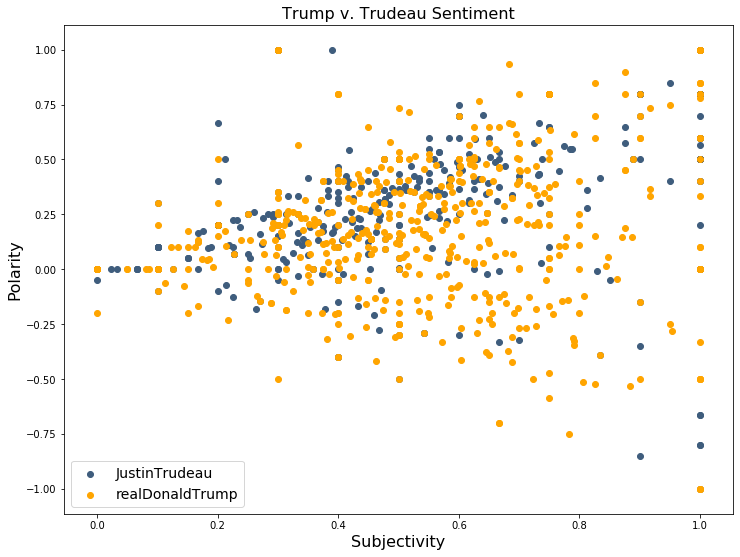

In [124]:
trudeau_sent, t = sentiment_over_time(trudeau_tweets, 700)
trump_sent, t = sentiment_over_time(trump_tweets, 700)
plot_sentiment_scatter(trudeau_sent,
                       trump_sent,
                       ['JustinTrudeau', 'realDonaldTrump'],
                       'trumpvtrudeau')

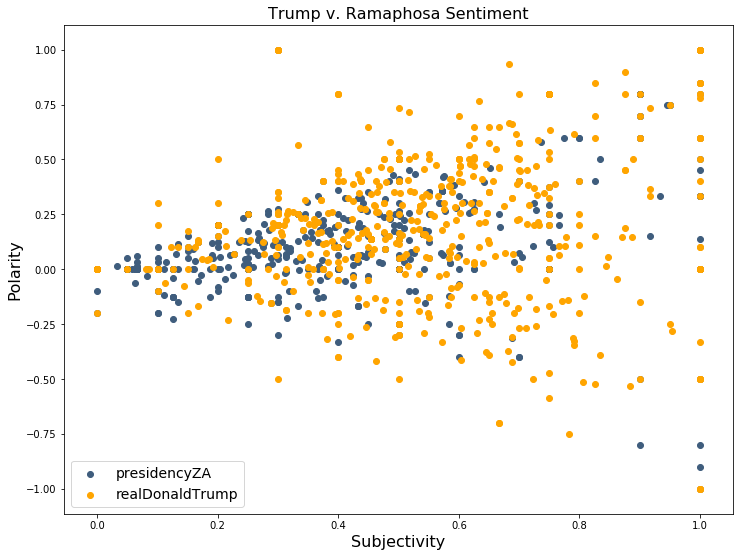

In [126]:
za_sent, t = sentiment_over_time(za_tweets, 700)
trump_sent, t = sentiment_over_time(trump_tweets, 700)

plot_sentiment_scatter(za_sent,
                       trump_sent,
                       ['presidencyZA', 'realDonaldTrump'],
                       'trumpvza')

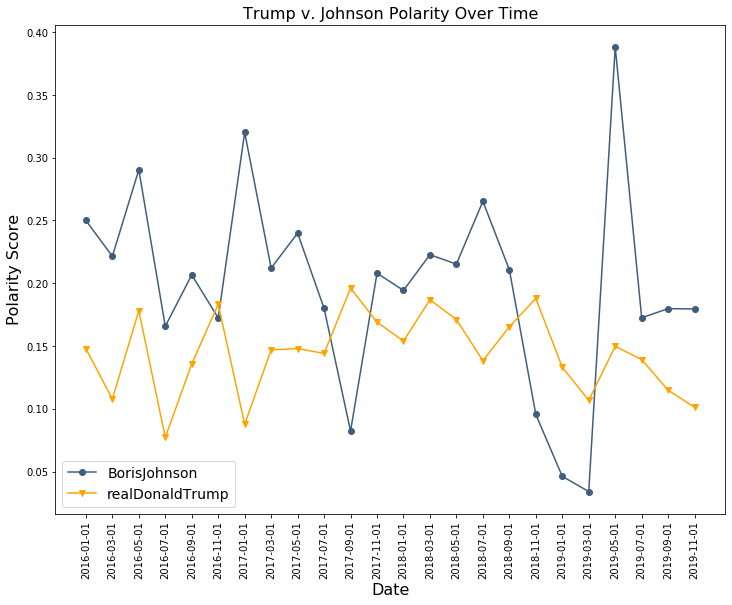

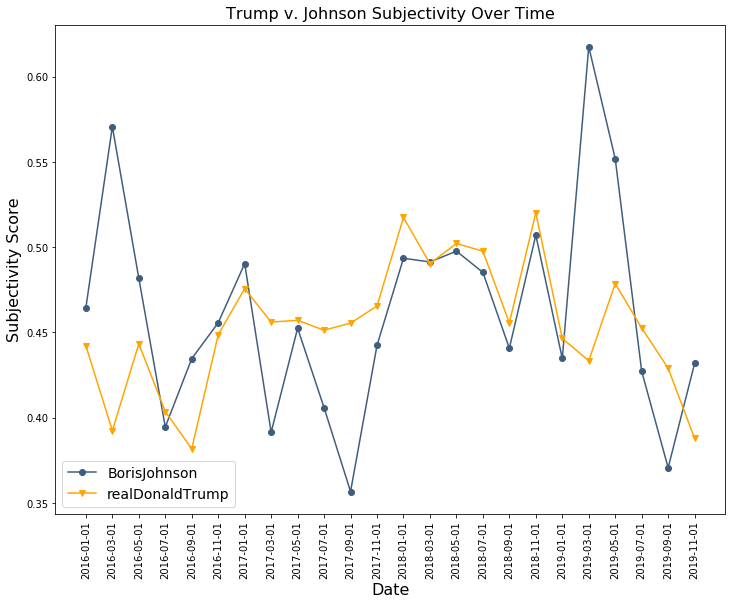

In [128]:
boris_sent, time = average_sent(boris_tweets)
trump_sent, time = average_sent(trump_tweets)

pols = [boris_sent[0], trump_sent[0]]
subs = [boris_sent[1], trump_sent[1]]

plot_polarity_over_time(pols, time, ['BorisJohnson', 'realDonaldTrump'], 'boristrump_pol')
plot_subjectivity_over_time(subs, time, ['BorisJohnson', 'realDonaldTrump'], 'boristrump_sub')

In [129]:
def average_sent_one_month(tweets):
    '''Averages Tweet Sentiment Per Month, and returns
    polarity and subjectivity corresponding to a time'''
    pol = []
    sub = []
    time = []
    for year in range(16, 20):
        for month in range(1, 13, 2):
            if (month == 2):
                start = f'20{year}-0{month}-01'
                end = f'20{year}-0{month}-28'
            elif (month < 10):
                start = f'20{year}-0{month}-01'
                end = f'20{year}-0{month}-30'
            else:
                start = f'20{year}-{month}-01'
                end = f'20{year}-{month}-30'
            tweet_ir = get_tweets_range(tweets, start, end)
            p = 0
            s = 0
            for tweet in tweet_ir:
                ss = TextBlob(tweet['text']).sentiment
                p += ss[0]
                s += ss[1]
            if (len(tweet_ir) != 0):
                p /= len(tweet_ir)
                s /= len(tweet_ir)
            pol.append(p)
            sub.append(s)
            time.append(start)
    return (pol, sub), time

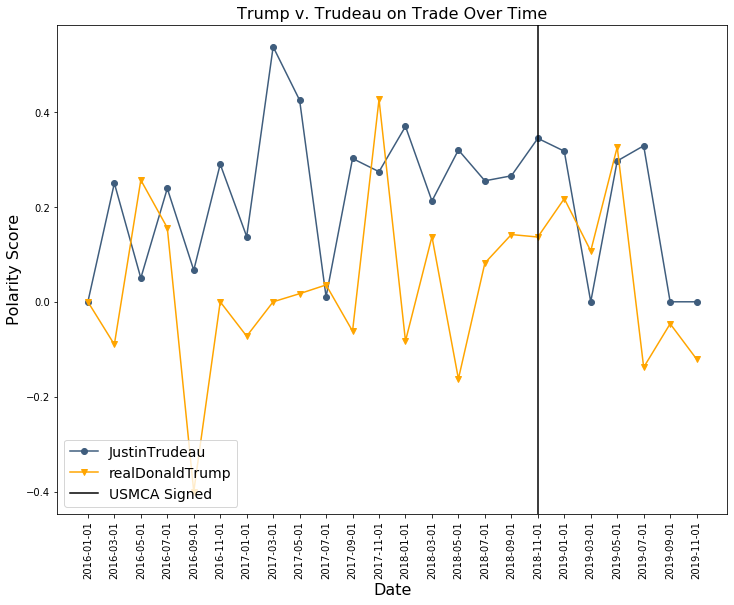

In [131]:
trump_trade = get_tweets_with_keyword(get_tweets_without_keyword(trump_tweets, 'china'), 'trade')
trudeau_trade = get_tweets_with_keyword(trudeau_tweets, 'trade')

sent1, t = average_sent_one_month(trump_trade)
sent2, t = average_sent_one_month(trudeau_trade)

subs = [sent2[1], sent1[1]]
pols = [sent2[0], sent1[0]]
plot_polarity_over_time(pols, t, ['JustinTrudeau', 'realDonaldTrump'], 'trump_v_trudeau_trade')

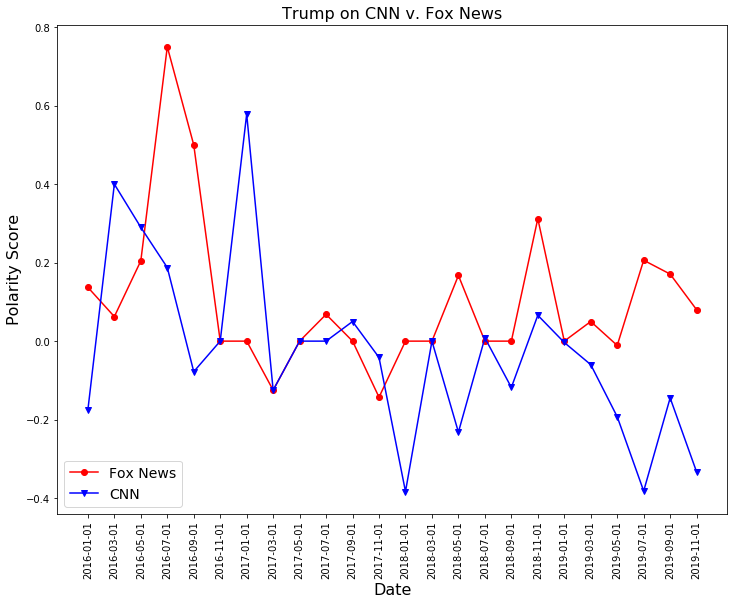

In [133]:
trump_cnn = get_tweets_with_keyword(trump_tweets, 'cnn')
trump_fox = get_tweets_with_keyword(trump_tweets, 'fox')

sent1, t = average_sent_one_month(trump_cnn)
sent2, t = average_sent_one_month(trump_fox)

subs = [sent2[1], sent1[1]]
pols = [sent2[0], sent1[0]]
plot_polarity_over_time(pols, t, ['Fox News', 'CNN'], 'trump_fox_cnn')

### Major Sentiment Over Time Graph (Not Great)

In [99]:
def average_sent_custom(tweets):
    '''Averages Tweet Sentiment Per Month, and returns
    polarity and subjectivity corresponding to a time'''
    pol = []
    sub = []
    time = []
    year = '2016'
    month = '11'
    for day in range(1, 30):
        if (day < 9):
            start = f'{year}-{month}-0{day}'
            end = f'{year}-{month}-0{day+1}'
        elif day < 10:
            start = f'{year}-{month}-0{day}'
            end = f'{year}-{month}-{day+1}'
        else:
            start = f'{year}-{month}-{day}'
            end = f'{year}-{month}-{day+1}'
        tweet_ir = get_tweets_range(tweets, start, end)
        p = 0
        s = 0
        for tweet in tweet_ir:
            ss = TextBlob(tweet['text']).sentiment
            p += ss[0]
            s += ss[1]
        if (len(tweet_ir) != 0):
            p /= len(tweet_ir)
            s /= len(tweet_ir)
        pol.append(p)
        sub.append(s)
        time.append(start)
    return (pol, sub), time

trump_s, t = average_sent_custom(trump_tweets)
biden_s, t = average_sent_custom(biden_tweets)
boris_s, t = average_sent_custom(boris_tweets)
trudeau_s, t = average_sent_custom(trudeau_tweets)

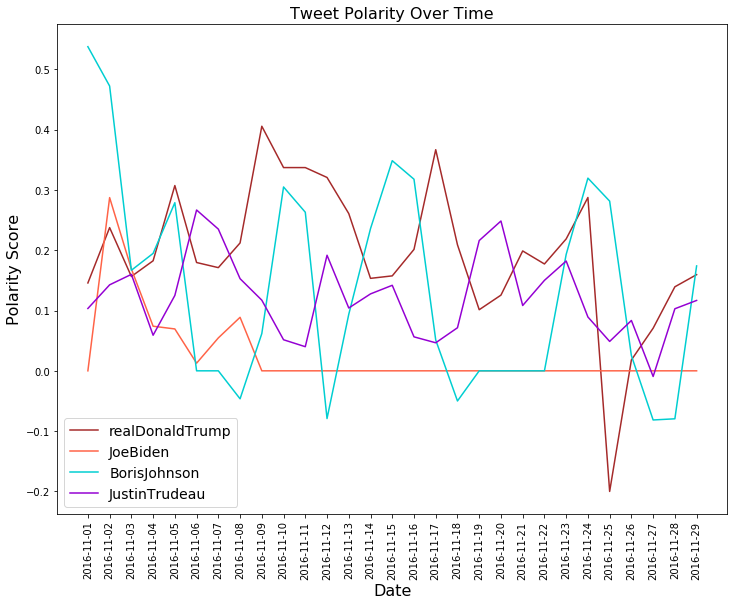

In [101]:
cs = [
    'brown',
    'tomato',
    'darkturquoise',
    'darkviolet'
]

def polarity_over_time(sents, time, accounts, filename):
    plt.figure(figsize=(12, 9))
    plt.title('Tweet Polarity Over Time', fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=16)  
    plt.ylabel('Polarity Score', fontsize=16)
    for sent, acc, color in zip(sents, accounts, cs):
        plt.plot(time, sent[0], label=acc, color=color)
    plt.legend(loc=3, fontsize=14)
    plt.savefig(f'./blog_res/{filename}.png', dpi=300)
    plt.show()
    
accounts = ['realDonaldTrump', 'JoeBiden', 'BorisJohnson', 'JustinTrudeau']
polarity_over_time([trump_s, biden_s, boris_s, trudeau_s], t, accounts, 'major_polarity_comp')